# 1. Buatlah ekpresi generator untuk membaca Anscombe's Quartet Dataset 

In [1]:
import urllib.request

def read_file(filename):
    for line in open(filename):
        x123, y1, y2, y3, x4, y4 = map(lambda x:x, line.strip().split(','))
        yield (x123, y1, y2, y3, x4, y4)

def print_file(lines):
    for line in lines:
        print(line)

def Anscombes_quartet(file):
    line = read_file(file)
    print_file(line)

urllib.request.urlretrieve('https://raw.githubusercontent.com/Mif212/dokumen/main/Anscombe_quartet_data.csv',"data.csv")
Anscombes_quartet("data.csv")

('x123', 'y1', 'y2', 'y3', 'x4', 'y4')
('10.0', '8.04', '9.14', '7.46', '8.0', '6.58')
('8.0', '6.95', '8.14', '6.77', '8.0', '5.76')
('13.0', '7.58', '8.74', '12.74', '8.0', '7.71')
('9.0', '8.81', '8.77', '7.11', '8.0', '8.84')
('11.0', '8.33', '9.26', '7.81', '8.0', '8.47')
('14.0', '9.96', '8.10', '8.84', '8.0', '7.04')
('6.0', '7.24', '6.13', '6.08', '8.0', '5.25')
('4.0', '4.26', '3.10', '5.39', '19.0', '12.50')
('12.0', '10.84', '9.13', '8.15', '8.0', '5.56')
('7.0', '4.82', '7.26', '6.42', '8.0', '7.91')
('5.0', '5.68', '4.74', '5.73', '8.0', '6.89')


# 2. Buatlah beberapa pemrosesan gambar dan memiliki pelet warna tertentu, diwakili oleh nama dan (R, G, B) tupel

Mencari 3 warna yang sering muncul pada gambar dengan euclidean distance

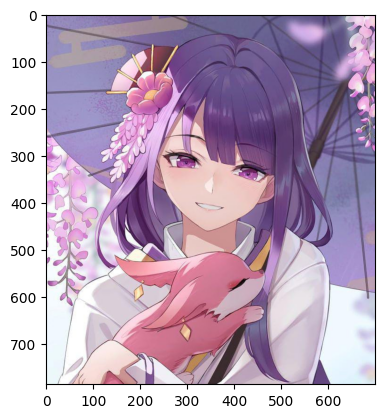

3 warna/warna terdekat paling banyak muncul pada gambar adalah: Pink, White, dan Purple


In [2]:
from PIL import Image
from collections import namedtuple
import math
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

urllib.request.urlretrieve('https://raw.githubusercontent.com/Mif212/dokumen/main/Hihi.jpeg',"raiden.jpeg")
img = Image.open('raiden.jpeg')
image = img.convert('RGB')

Color = namedtuple('Color', ('name', 'R', 'G', 'B'))
colors = [
    Color('Red', 255, 0, 0),
    Color('Green', 0, 255, 0),
    Color('Blue', 0, 0, 255),
    Color('Yellow', 255, 255, 0),
    Color('Purple', 128, 0, 128),
    Color('White', 0, 0, 0),
    Color('Orange', 255, 165, 0),
    Color('Pink', 255, 192, 203),  
    Color('Dark Green', 0, 128, 0),
    Color('Light Green', 152, 251, 152),
    Color('Dark Blue', 0, 0, 128),
    Color('Light Blue', 0, 191, 255),
]

def process_image(color):
    """Tanpa Numpy Array"""
    # euclidean_distance = lambda c1, c2 : math.sqrt((c1[0]-c2[0])**2 + (c1[1]-c2[1])**2 + (c1[2]-c2[2])**2)
    # pixels = [(x, y) for x in range(image.width) for y in range(image.height)]
    # distances = list(map(lambda p: euclidean_distance(img.getpixel(p), (color.R, color.G, color.B)), pixels))
    # jml_pixel = reduce(lambda acc, d: acc + 1 if d < 50 else acc, distances, 0)
    # return jml_pixel

    """Dengan Numpy Array"""
    # kalo gak pake numpy array lama komputasinya 
    arr = np.array(image)
    color_arr = np.array([color.R, color.G, color.B])
    distances = np.linalg.norm(arr - color_arr, axis=2)
    jml_pixel = np.sum(distances < 50)
    return jml_pixel
    

data_jml_pixel = list(map(process_image, colors))
urut = [i for _, i in sorted(zip(data_jml_pixel, colors), reverse=True)]
img = mpimg.imread('raiden.jpeg')
plt.imshow(img)
plt.show()
print(f"3 warna/warna terdekat paling banyak muncul pada gambar adalah: {urut[0].name}, {urut[1].name}, dan {urut[2].name}")


# 3. lakukan pengambilan file JSON melalui webscrapping dan bersihkan menggunakan fungsi replace. Tampilkan juga tree grafiknya

In [3]:
import json

response = urllib.request.urlopen("https://jsonplaceholder.typicode.com/todos")
data = json.loads(response.read())
data


[{'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False},
 {'userId': 1,
  'id': 2,
  'title': 'quis ut nam facilis et officia qui',
  'completed': False},
 {'userId': 1, 'id': 3, 'title': 'fugiat veniam minus', 'completed': False},
 {'userId': 1, 'id': 4, 'title': 'et porro tempora', 'completed': True},
 {'userId': 1,
  'id': 5,
  'title': 'laboriosam mollitia et enim quasi adipisci quia provident illum',
  'completed': False},
 {'userId': 1,
  'id': 6,
  'title': 'qui ullam ratione quibusdam voluptatem quia omnis',
  'completed': False},
 {'userId': 1,
  'id': 7,
  'title': 'illo expedita consequatur quia in',
  'completed': False},
 {'userId': 1,
  'id': 8,
  'title': 'quo adipisci enim quam ut ab',
  'completed': True},
 {'userId': 1,
  'id': 9,
  'title': 'molestiae perspiciatis ipsa',
  'completed': False},
 {'userId': 1,
  'id': 10,
  'title': 'illo est ratione doloremque quia maiores aut',
  'completed': True},
 {'userId': 1,
  'id': 11,
  'title': 'vero rerum

Saya tidak tahu apa yang harus dibersihkan karena menurut saya datanya sudah bersih, mungkin saya akan mengganti key dictionary dengan bahasa Indonesia

In [4]:
datas = json.dumps(data)
json_data = datas.replace("userId", "Id User")
json_data = json_data.replace("id", "Id")
json_data = json_data.replace("title", "Judul")
json_data = json_data.replace("completed", "Lengkap")
data = json.loads(json_data)

In [5]:
# Tree Grafik
from anytree import Node, RenderTree
root = Node("JSON Data")
for item in data:
    item_node = Node(str(item), parent=root)

for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))

JSON Data
├── {'Id User': 1, 'Id': 1, 'Judul': 'delectus aut autem', 'Lengkap': False}
├── {'Id User': 1, 'Id': 2, 'Judul': 'quis ut nam facilis et officia qui', 'Lengkap': False}
├── {'Id User': 1, 'Id': 3, 'Judul': 'fugiat veniam minus', 'Lengkap': False}
├── {'Id User': 1, 'Id': 4, 'Judul': 'et porro tempora', 'Lengkap': True}
├── {'Id User': 1, 'Id': 5, 'Judul': 'laboriosam mollitia et enim quasi adipisci quia provIdent illum', 'Lengkap': False}
├── {'Id User': 1, 'Id': 6, 'Judul': 'qui ullam ratione quibusdam voluptatem quia omnis', 'Lengkap': False}
├── {'Id User': 1, 'Id': 7, 'Judul': 'illo expedita consequatur quia in', 'Lengkap': False}
├── {'Id User': 1, 'Id': 8, 'Judul': 'quo adipisci enim quam ut ab', 'Lengkap': True}
├── {'Id User': 1, 'Id': 9, 'Judul': 'molestiae perspiciatis ipsa', 'Lengkap': False}
├── {'Id User': 1, 'Id': 10, 'Judul': 'illo est ratione doloremque quia maiores aut', 'Lengkap': True}
├── {'Id User': 1, 'Id': 11, 'Judul': 'vero rerum temporibus dolor', 'L